# Campus Recruitment Project

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset

df = pd.read_csv('Dataset/Placement_Data_Full_Class.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.shape

(215, 15)

In [7]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# Exploratory Data Analysis
---
#### Note: A general EDA is performed in this project and not based on a particular feature.

In [8]:
## t-test

def t_test(num, cat, df):
    
    from scipy.stats import ttest_ind
    
    Ho = f'There is no significant impact of {num} on {cat} (No predictability)'
    Ha = f'There is a significant impact of {num} on {cat} (Good Predictor)'
    
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    un1 = df[cat].unique()[0]
    un2 = df[cat].unique()[1]
    
    ind1 = df[df[cat]==un1][num]
    ind2 = df[df[cat]==un2][num]
    
    test_stat, p = ttest_ind(ind1, ind2)
    print('Test Statistics: ', test_stat)
    print('P-value: ', p, '\n')
    
    if p>alpha:
        print('Fail to reject Ho, ', Ho)
    else:
        print('Reject Ho, ', Ha)
        
    return p

In [9]:
# chi2 test

def chi2(x, y, df):
    
    from scipy.stats import chi2_contingency
    
    Ho = f'There is no significant assosiation between {x} and {y} (No predictability)'
    Ha = f'There is a significant assosiation between {x} and {y} (Good predictor)'
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    ct = pd.crosstab(df[x], df[y]) 
    test_chi2, p, dof, ex = chi2_contingency(ct)
    
    print('Test Statistics: ', test_chi2)
    print('P-value: ', p, '\n')
    
    if p>alpha:
        print('Fail to reject Ho, ', Ho)
    else: 
        print('Reject Ho, ', Ha)
        
    return p

In [10]:
p_value = {}
drop = []

In [11]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [12]:
df.sl_no.head()

0    1
1    2
2    3
3    4
4    5
Name: sl_no, dtype: int64

In [13]:
df.sl_no.nunique()

215

#### gender

In [14]:
df.gender.head()

0    M
1    M
2    M
3    M
4    M
Name: gender, dtype: object

In [15]:
df.gender.unique()

array(['M', 'F'], dtype=object)

<AxesSubplot:xlabel='gender', ylabel='count'>

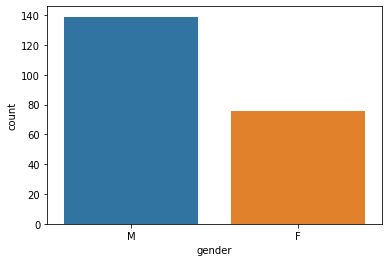

In [16]:
sns.countplot(df.gender)

In [17]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

In [18]:
# out of 215 students, 139 are male and 76 are female

In [19]:
p_value['gender'] = chi2('gender', 'status', df)

Ho:  There is no significant assosiation between gender and status (No predictability)
Ha:  There is a significant assosiation between gender and status (Good predictor)


Test Statistics:  1.3817539668505108
P-value:  0.23980260881037566 

Fail to reject Ho,  There is no significant assosiation between gender and status (No predictability)


In [20]:
drop.append('gender')

#### ssc_p

In [21]:
# Secondary Education percentage- 10th Grade

In [22]:
df['ssc_p'].head()

0    67.00
1    79.33
2    65.00
3    56.00
4    85.80
Name: ssc_p, dtype: float64

<AxesSubplot:xlabel='ssc_p'>

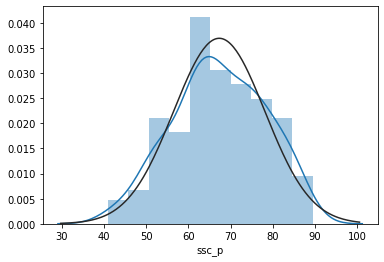

In [23]:
sns.distplot(df['ssc_p'], fit=norm)

In [24]:
# The distribution is normal

<AxesSubplot:xlabel='gender', ylabel='ssc_p'>

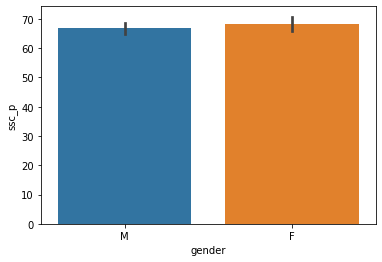

In [25]:
sns.barplot(x=df.gender, y=df.ssc_p) 

In [26]:
df.groupby('gender').mean()['ssc_p']

gender
F    68.310921
M    66.752518
Name: ssc_p, dtype: float64

In [27]:
# Both male and female students got almost average marks in 10th class

In [28]:
p_value['ssc_p'] = t_test('ssc_p', 'status', df)

Ho:  There is no significant impact of ssc_p on status (No predictability)
Ha:  There is a significant impact of ssc_p on status (Good Predictor)


Test Statistics:  11.173294337111484
P-value:  4.115201043884403e-23 

Reject Ho,  There is a significant impact of ssc_p on status (Good Predictor)


#### ssc_b

In [29]:
# Board of Education- Central/ Others

In [30]:
df['ssc_b'].head()

0     Others
1    Central
2    Central
3    Central
4    Central
Name: ssc_b, dtype: object

In [31]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

<AxesSubplot:xlabel='ssc_b', ylabel='count'>

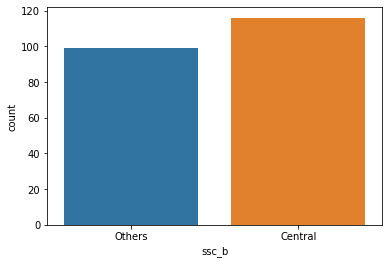

In [32]:
sns.countplot(df['ssc_b'])

In [33]:
# More students here are from central board

In [34]:
### Does the Board of education have an influence on the marks secured by a student? ###

df.groupby('ssc_b').mean()['ssc_p']

ssc_b
Central    66.143879
Others     68.662020
Name: ssc_p, dtype: float64

In [35]:
# The 10th percentage marks are a bit higher for Others than central board

In [36]:
### Does gender affects the choice of board? ###

pd.crosstab(index=df.gender, columns=df.ssc_b, normalize='index')

ssc_b,Central,Others
gender,,
F,0.552632,0.447368
M,0.532374,0.467626


In [37]:
# gender does not affect the choice of board of education

In [38]:
p_value['ssc_b'] = chi2('ssc_b', 'status', df)

Ho:  There is no significant assosiation between ssc_b and status (No predictability)
Ha:  There is a significant assosiation between ssc_b and status (Good predictor)


Test Statistics:  0.15933127499487468
P-value:  0.6897729431530739 

Fail to reject Ho,  There is no significant assosiation between ssc_b and status (No predictability)


In [39]:
drop.append('ssc_b')

#### hsc_p

In [40]:
# Higher Secondary Education percentage- 12th Grade

<AxesSubplot:xlabel='hsc_p'>

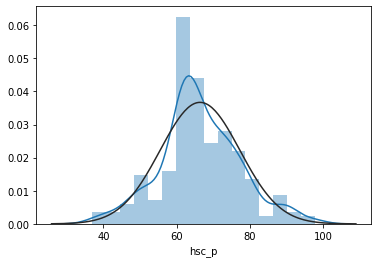

In [41]:
### What is the distribution of percentage of 12th grade? ###

sns.distplot(df.hsc_p, fit=norm)

In [42]:
# The distribution is almost normal.

<AxesSubplot:xlabel='gender', ylabel='hsc_p'>

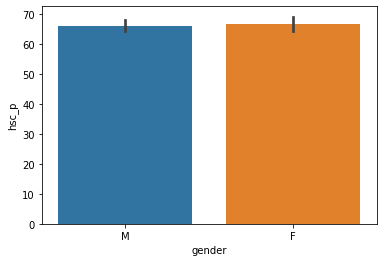

In [43]:
### Does gender affects the marks scored by students in 12th grade ? ###

sns.barplot(x=df.gender, y=df.hsc_p)

In [44]:
# Gender is not a factor that determines the percentage marks students score in 12th grade.

<AxesSubplot:xlabel='ssc_p', ylabel='hsc_p'>

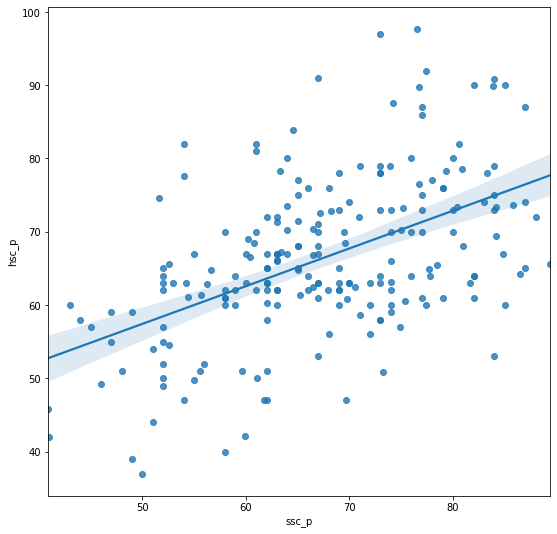

In [45]:
### Does the marks scored by a student in 10th grade reflect on the marks scored by him/her in 12th grade ? ###
plt.figure(figsize=(9,9))
sns.regplot(x=df.ssc_p, y=df.hsc_p)

In [46]:
# There seems to be an upward trend, ie students who scored good in 10th grade also scored good in 12th grade.

In [47]:
p_value['hsc_p'] = t_test('hsc_p', 'status', df)

Ho:  There is no significant impact of hsc_p on status (No predictability)
Ha:  There is a significant impact of hsc_p on status (Good Predictor)


Test Statistics:  8.230746477379519
P-value:  1.849212756931434e-14 

Reject Ho,  There is a significant impact of hsc_p on status (Good Predictor)


#### hsc_b

In [48]:
# Board of Education- Central/ Others

In [49]:
df.hsc_b.value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

<AxesSubplot:xlabel='hsc_b', ylabel='count'>

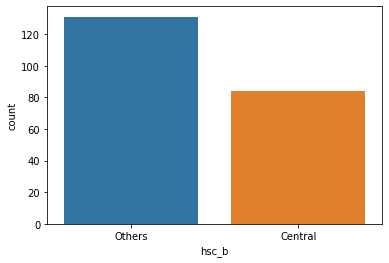

In [50]:
sns.countplot(df.hsc_b)

<AxesSubplot:xlabel='hsc_b', ylabel='count'>

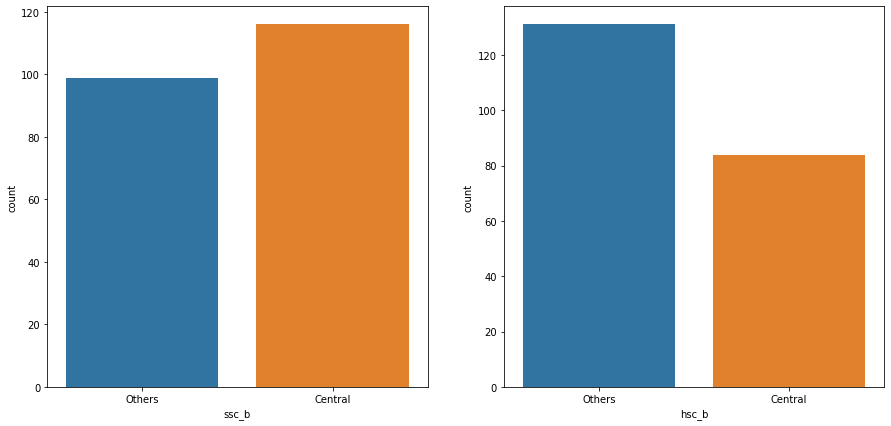

In [51]:
### Is there a preference for board of education for 10th grade and 12th grade

fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.countplot(ax=axes[0], x=df.ssc_b)
sns.countplot(ax=axes[1], x=df.hsc_b)

In [52]:
# There is a decrease in preference for central board in the 12th grade

In [53]:
p_value['hsc_b'] = chi2('hsc_b', 'status', df)

Ho:  There is no significant assosiation between hsc_b and status (No predictability)
Ha:  There is a significant assosiation between hsc_b and status (Good predictor)


Test Statistics:  0.009517458006762429
P-value:  0.9222837052885 

Fail to reject Ho,  There is no significant assosiation between hsc_b and status (No predictability)


In [54]:
drop.append('hsc_b')

#### hsc_s

In [55]:
# Specialization in Higher Secondary Education

In [56]:
df.hsc_s.value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

<AxesSubplot:xlabel='hsc_s', ylabel='count'>

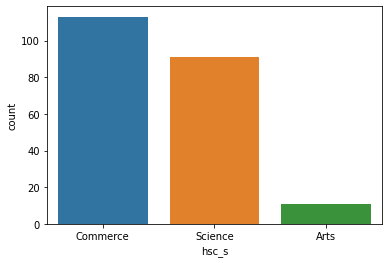

In [57]:
sns.countplot(df.hsc_s)

In [58]:
# Commerce and Science specialization is preffered by the students than Arts specialization

In [59]:
### Does gender influence the selection of specialization in 12th grade? ###

pd.crosstab(df.gender, df.hsc_s, normalize='index') * 100

hsc_s,Arts,Commerce,Science
gender,,,
F,7.894737,52.631579,39.473684
M,3.597122,52.517986,43.884892


In [60]:
# Female students tend to select Arts specialization more than Male students.
# But taking Commerce specialization has an equal probability for Male and Female students.
# Male students have a high probability of choosing Science than Female students.

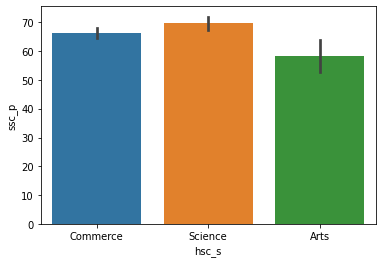

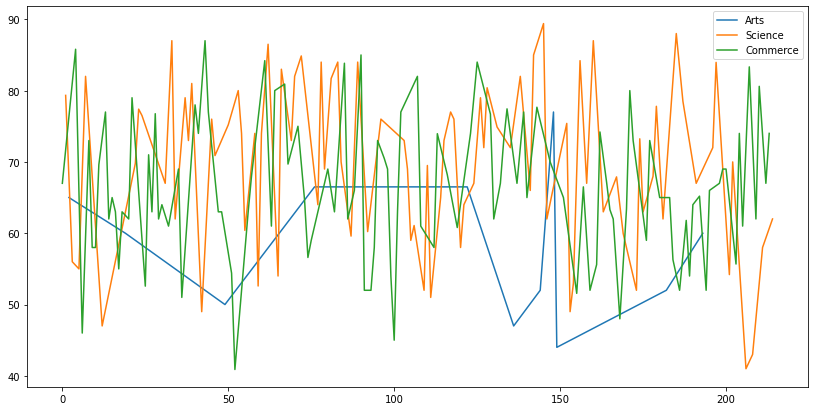

In [61]:
### Does the marks scored in 10th affects the choice of specialization? ###

sns.barplot(x=df.hsc_s, y=df.ssc_p)
plt.show()

plt.figure(figsize=(14,7))
sns.lineplot(data=df[df.hsc_s=='Arts']['ssc_p'], label='Arts')
sns.lineplot(data=df[df.hsc_s=='Science']['ssc_p'], label='Science')
sns.lineplot(data=df[df.hsc_s=='Commerce']['ssc_p'], label='Commerce')
plt.show()

In [62]:
# Students who specialized in Arts got lower marks in 10th grade compared to other specializations

# One thing to note here is that, the proportion of Arts students are very low compared to other specializations,
# so, we cannot completly accept the above statement.

In [63]:
p_value['hsc_s'] = chi2('hsc_s', 'status', df)

Ho:  There is no significant assosiation between hsc_s and status (No predictability)
Ha:  There is a significant assosiation between hsc_s and status (Good predictor)


Test Statistics:  1.114745132708414
P-value:  0.5727118511343621 

Fail to reject Ho,  There is no significant assosiation between hsc_s and status (No predictability)


In [64]:
drop.append('hsc_s')

#### degree_p

In [65]:
# Degree Percentage

In [66]:
df['degree_p'].describe()

count    215.000000
mean      66.370186
std        7.358743
min       50.000000
25%       61.000000
50%       66.000000
75%       72.000000
max       91.000000
Name: degree_p, dtype: float64

<AxesSubplot:xlabel='degree_p'>

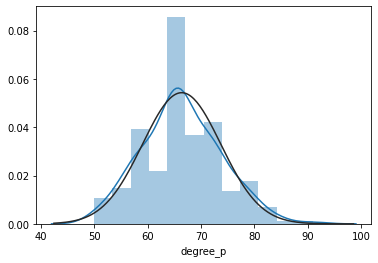

In [67]:
### What is the distribution of degree percentage? ###

sns.distplot(df.degree_p, fit=norm)

In [68]:
# The distribution is normal

<AxesSubplot:xlabel='gender', ylabel='degree_p'>

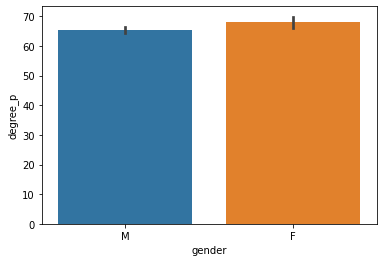

In [69]:
### Does gender affects the percentage of marks in degree? ###

sns.barplot(x=df.gender, y=df.degree_p)

In [70]:
# Gender is not a factor that decides the percentage of marks scored by a student in degree.

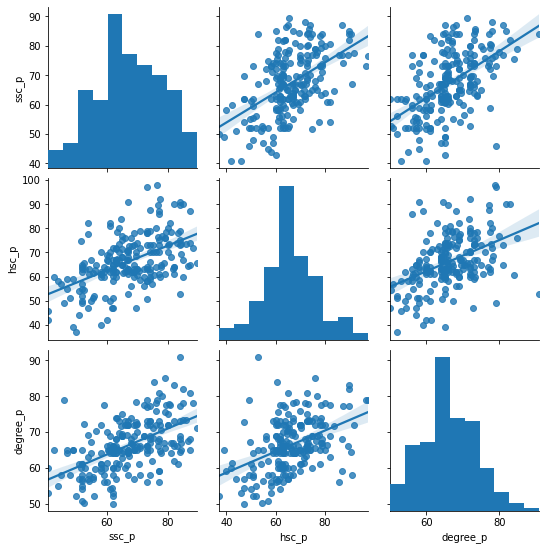

In [71]:
### Is there a consistent increase of decrease in students marks from 10th to degree? ###

sns.pairplot(data=df[['ssc_p', 'hsc_p', 'degree_p']], kind='reg')

In [72]:
# The percentage marks are consistently increasing for students from ssc to degree.

In [73]:
p_value['degree_p'] = t_test('degree_p', 'status', df)

Ho:  There is no significant impact of degree_p on status (No predictability)
Ha:  There is a significant impact of degree_p on status (Good Predictor)


Test Statistics:  7.982429212839097
P-value:  8.807682138862608e-14 

Reject Ho,  There is a significant impact of degree_p on status (Good Predictor)


#### degree_t

In [74]:
# Under Graduation(Degree type)- Field of degree education

In [75]:
df.degree_t.describe()

count           215
unique            3
top       Comm&Mgmt
freq            145
Name: degree_t, dtype: object

In [76]:
df.degree_t.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

<AxesSubplot:xlabel='degree_t', ylabel='count'>

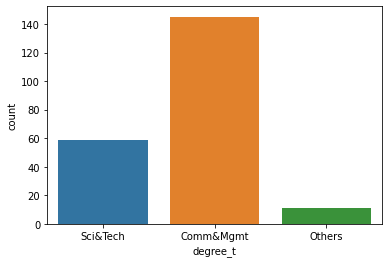

In [77]:
sns.countplot(df.degree_t)

In [78]:
# Most students opted for commerce and management in college.

<AxesSubplot:xlabel='degree_t', ylabel='hsc_p'>

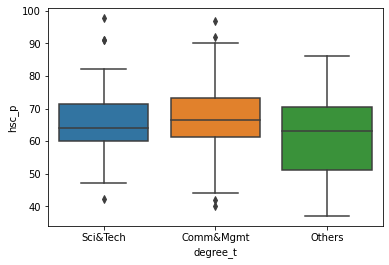

In [79]:
### Does the 12th marks affect the choice of specialization in college? ###

sns.boxplot(x=df.degree_t, y=df.hsc_p)

In [80]:
# Marks scored by the student in 12th grade has an impact,
# but not a defining factor for the choice of specialization in college.

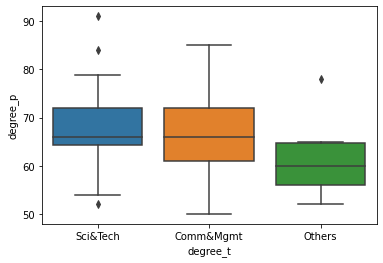

degree_t
Comm&Mgmt    66.203103
Others       60.666364
Sci&Tech     67.844237
Name: degree_p, dtype: float64

In [81]:
### Which specialization has the highest average score? ###

sns.boxplot(x=df.degree_t, y=df.degree_p)
plt.show()

df.groupby('degree_t').mean()['degree_p']

In [82]:
# The highest average score is from the Science and Tech branch and the lowest average score is from 'Others' branch.

In [83]:
### Does gender influences the choice of specialization? ###

pd.crosstab(df.gender, df.degree_t, normalize='index') * 100

degree_t,Comm&Mgmt,Others,Sci&Tech
gender,,,
F,69.736842,7.894737,22.368421
M,66.187050,3.597122,30.215827


In [84]:
# Female students are more likely to take Commerce and Management and Other as their specialization than Male students.
# But Male students are more likely to take Science than Female students.

In [85]:
### How is hsc specialization and degree specialization associated? ###

pd.crosstab(df.degree_t, df.hsc_s, normalize='columns') * 100

hsc_s,Arts,Commerce,Science
degree_t,,,
Comm&Mgmt,63.636364,96.460177,31.868132
Others,36.363636,0.884956,6.593407
Sci&Tech,0.000000,2.654867,61.538462


In [86]:
# Of all the students who took up Arts major in 12th grade, 63.6% students took up Commerce&Management and 36.3% 
# took up Others in college.
# Of all the students who took up Commerce in 12th grade, only 2.6% changed to Sci&Tech, most of the remaining students
# majored in Comm&Mgmt in college.
# Of all the students who took up Science in 12th grade, 31.8% students changed to Comm&Mgmt and 6.5% changed to Others
# in college. This is a huge change, only 61.5% students stayed in Sci&Tech background in college.

In [87]:
p_value['degree_t'] = chi2('degree_t', 'status', df)

Ho:  There is no significant assosiation between degree_t and status (No predictability)
Ha:  There is a significant assosiation between degree_t and status (Good predictor)


Test Statistics:  2.9690428771222925
P-value:  0.22661076190356658 

Fail to reject Ho,  There is no significant assosiation between degree_t and status (No predictability)


In [88]:
drop.append('degree_t')

#### workex

In [89]:
# Work Experience

In [90]:
df.workex.describe()

count     215
unique      2
top        No
freq      141
Name: workex, dtype: object

In [91]:
df.workex.value_counts()

No     141
Yes     74
Name: workex, dtype: int64

<AxesSubplot:xlabel='workex', ylabel='count'>

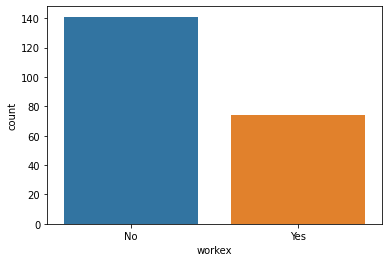

In [92]:
sns.countplot(df.workex)

In [93]:
# Most students dont have a work experience

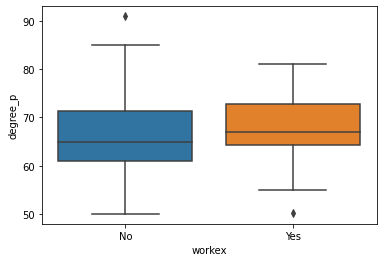

workex
No     65.717872
Yes    67.613108
Name: degree_p, dtype: float64

In [94]:
### Does degree percentage has anything to do with work experience? ###

sns.boxplot(x=df.workex, y=df.degree_p)
plt.show()

df.groupby('workex').mean()['degree_p']

In [95]:
# The mean marks of students with work experience is a bit higher.

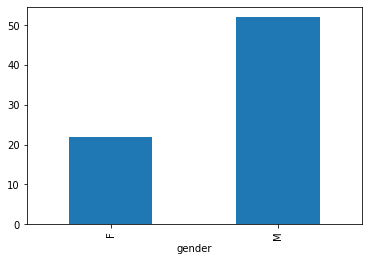

gender
F    22
M    52
Name: workex, dtype: int64

In [96]:
### Of the students who have work experience, how many Males and Females are there? ###

df[df.workex=='Yes'].groupby('gender').count()['workex'].plot(kind='bar')
plt.show()

df[df.workex=='Yes'].groupby('gender').count()['workex']

In [97]:
# There are 52 boys and 22 girls with work experience.

In [98]:
p_value['workex'] = chi2('workex', 'status', df)

Ho:  There is no significant assosiation between workex and status (No predictability)
Ha:  There is a significant assosiation between workex and status (Good predictor)


Test Statistics:  15.154425347637423
P-value:  9.906584720516494e-05 

Reject Ho,  There is a significant assosiation between workex and status (Good predictor)


#### etest_p

In [99]:
# Employability test percentage ( conducted by college)

In [100]:
df['etest_p'].describe()

count    215.000000
mean      72.100558
std       13.275956
min       50.000000
25%       60.000000
50%       71.000000
75%       83.500000
max       98.000000
Name: etest_p, dtype: float64

<AxesSubplot:xlabel='etest_p'>

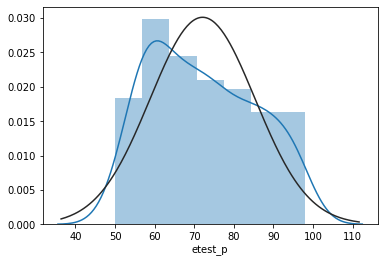

In [101]:
sns.distplot(df['etest_p'], fit=norm)

In [102]:
# Data is almost normal

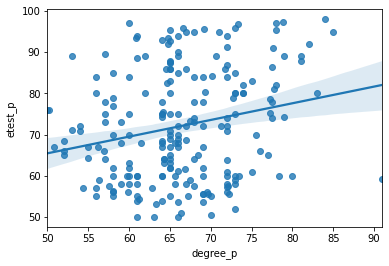

Correlation between Degree percentage and Eployability test:  0.22 %


In [103]:
### Is employability test and degree marks correlated? ###

sns.regplot(df.degree_p, df.etest_p)
plt.show()

from scipy.stats import pearsonr
corr,_ = pearsonr(df.degree_p, df.etest_p)
print('Correlation between Degree percentage and Eployability test: ', round(corr,2), '%')

In [104]:
# Degree marks and employability test scores are not highly correlated

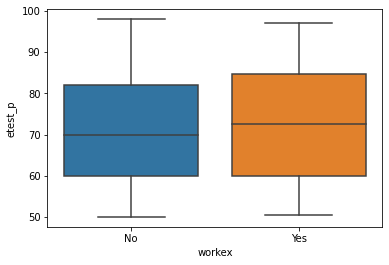

workex
No     71.556170
Yes    73.137838
Name: etest_p, dtype: float64

In [105]:
### Does having a work experience increase the employability score? ###

sns.boxplot(df.workex, df.etest_p)
plt.show()

df.groupby('workex').mean()['etest_p']

In [106]:
# Students with work experience have a bit advantage in employability score, than inexperienced student.

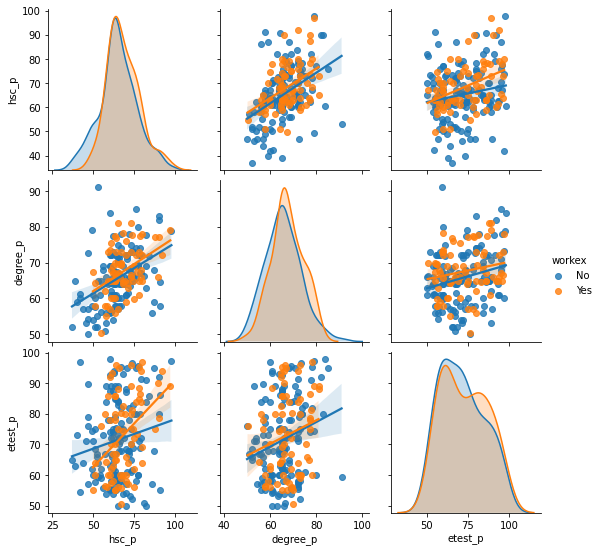

In [107]:
### Is employability score correlated with past performance of the student? ###

sns.pairplot(df[['hsc_p', 'degree_p', 'etest_p', 'workex']], hue='workex', kind='reg')

In [108]:
# Students who scored good on 12th grade and those who have a work experience, showed good results in
# employability test.
# But overall the past performance have only little effect on employability test

In [109]:
p_value['etest_p'] = t_test('etest_p', 'status', df)

Ho:  There is no significant impact of etest_p on status (No predictability)
Ha:  There is a significant impact of etest_p on status (Good Predictor)


Test Statistics:  1.8781977946559039
P-value:  0.061720381110174166 

Fail to reject Ho,  There is no significant impact of etest_p on status (No predictability)


In [110]:
drop.append('etest_p')

#### specialisation

In [111]:
# Post Graduation(MBA)- Specialization

In [112]:
df.specialisation.describe()

count         215
unique          2
top       Mkt&Fin
freq          120
Name: specialisation, dtype: object

In [113]:
df.specialisation.value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

<AxesSubplot:xlabel='specialisation', ylabel='count'>

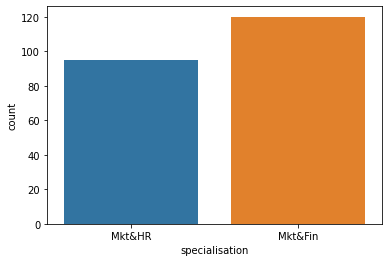

In [114]:
sns.countplot(df.specialisation)

In [115]:
# Most students chose Marketing and Finance

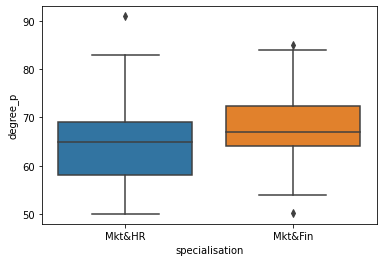

specialisation
Mkt&Fin    67.796083
Mkt&HR     64.569053
Name: degree_p, dtype: float64

In [116]:
### Does degree percentage affects the choice a student in his/her specialization in MBA? ###

sns.boxplot(df.specialisation, df.degree_p)
plt.show()

df.groupby('specialisation').mean()['degree_p']

In [117]:
# Students who specialised in Mkt&Fin scored an average percentage of 67.79% in degree, which is a little bit
# higher than students who specialised in Mkt&HR

In [118]:
### Does the degree specialisation affect MBA specialisation? ###

pd.crosstab(df.specialisation, df.degree_t, normalize='index') * 100

degree_t,Comm&Mgmt,Others,Sci&Tech
specialisation,,,
Mkt&Fin,71.666667,3.333333,25.000000
Mkt&HR,62.105263,7.368421,30.526316


In [119]:
# Of all the students who selected Mkt&Fin, 25% of them came from a Sci&Tech background and 71.6% comes from 
# Comm&Mgmt background.
# Of all the students who selected Mkt&HR, 30.5% of them came form Sci&Tech background and 62.1% comes from
# Comm&Mgmt background

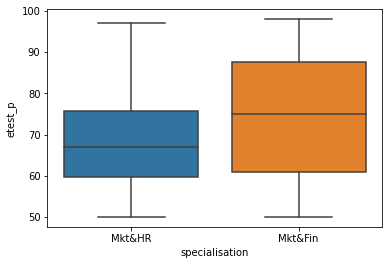

specialisation
Mkt&Fin    74.885500
Mkt&HR     68.582737
Name: etest_p, dtype: float64

In [120]:
### Does employability test affects the choice of specialization in MBA? ###

sns.boxplot(df.specialisation, df.etest_p)
plt.show()

df.groupby('specialisation').mean()['etest_p']

In [121]:
# The average employability score secured by a Mkt&Fin student is 74.88% which is higher than the average score
# secured by a Mkt&HR specialised student.

In [122]:
p_value['specialisation'] = chi2('specialisation', 'status', df)

Ho:  There is no significant assosiation between specialisation and status (No predictability)
Ha:  There is a significant assosiation between specialisation and status (Good predictor)


Test Statistics:  12.440229009203623
P-value:  0.00042018425858864284 

Reject Ho,  There is a significant assosiation between specialisation and status (Good predictor)


#### mba_p

In [123]:
# MBA percentage

In [124]:
df.mba_p.describe()

count    215.000000
mean      62.278186
std        5.833385
min       51.210000
25%       57.945000
50%       62.000000
75%       66.255000
max       77.890000
Name: mba_p, dtype: float64

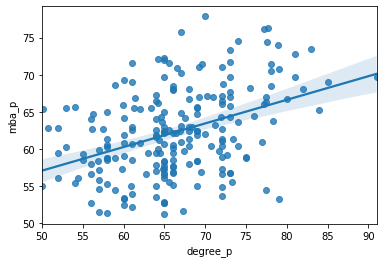

Correlation coefficient:  0.40236377062029177


In [125]:
### Does the marks scored by a student in MBA correlated to marks scored in degree? ###

sns.regplot(df.degree_p, df.mba_p)
plt.show()

corr,_ = pearsonr(df.degree_p, df.mba_p)
print('Correlation coefficient: ', corr)

In [126]:
# There is a 40% correlation between degree marks and mba marks.

<AxesSubplot:xlabel='workex', ylabel='mba_p'>

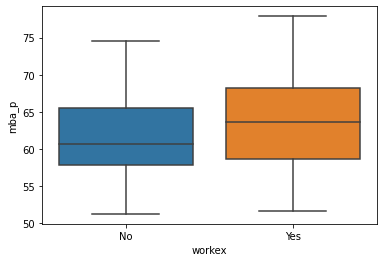

In [127]:
### How is mba marks related to work experience? ###

sns.boxplot(df.workex, df.mba_p)

In [128]:
# Students with work experience tend to score more marks in MBA

In [129]:
p_value['mba_p'] = t_test('mba_p', 'status', df)

Ho:  There is no significant impact of mba_p on status (No predictability)
Ha:  There is a significant impact of mba_p on status (Good Predictor)


Test Statistics:  1.1259706009659818
P-value:  0.26144500197748627 

Fail to reject Ho,  There is no significant impact of mba_p on status (No predictability)


In [130]:
drop.append('mba_p')

#### status

In [131]:
# Status of placement- Placed/Not placed

In [132]:
df.status.describe()

count        215
unique         2
top       Placed
freq         148
Name: status, dtype: object

In [133]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

148


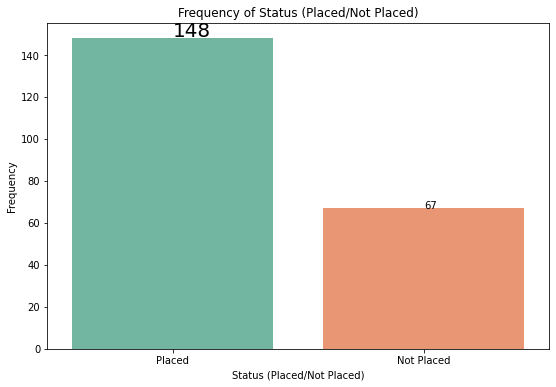

In [17]:
plt.figure(figsize=(9,6))
ax = sns.countplot(df.status, palette='Set2')

ax.annotate(ax.patches[0].get_height(),(-0.09,149))
ax.annotate(ax.patches[1].get_height(),(1,69))

plt.title('Frequency of Status (Placed/Not Placed)')
plt.xlabel('Status (Placed/Not Placed)')
plt.ylabel('Frequency')

plt.savefig('plots/Countplot_of_status.png')

In [135]:
# Most of the students got placed

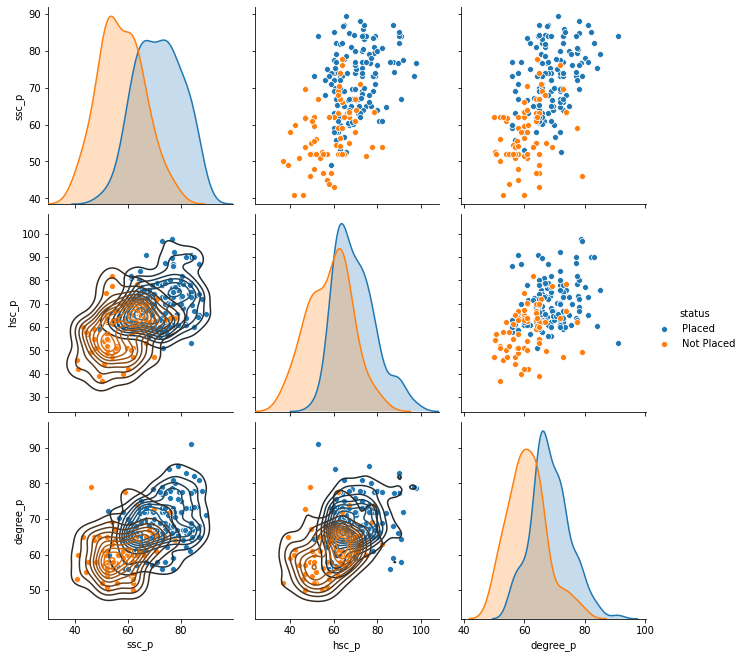

In [22]:
### Does the 10th, 12th and degree marks determine the chances of getting placed? ###

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef,2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.15, 0.95), size = 10, xycoords = ax.transAxes)


grid = sns.pairplot(df[['ssc_p', 'hsc_p','degree_p', 'status']], hue='status', size=3)
grid.map_upper(corr)
grid.map_lower(sns.kdeplot)

plt.suptitle(t='Pairplot of 10th, 12th and degree marks with Placement status', x=0.5, y=1.05, size=20)
plt.savefig('plots/Pairplot_of_marks_status.png')

In [137]:
# From the plot we can see that, most students who got placed are having good marks in 10th and 12th

In [138]:
### Does gender play a role in the placement of students? ###

pd.crosstab(df.gender, df.status, normalize='index') * 100

status,Not Placed,Placed
gender,,
F,36.842105,63.157895
M,28.057554,71.942446


<AxesSubplot:xlabel='status', ylabel='gender'>

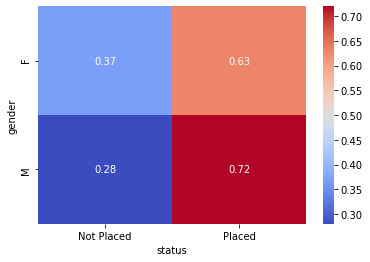

In [139]:
sns.heatmap(pd.crosstab(df.gender, df.status, normalize='index'),
           cmap='coolwarm', annot=True)

In [140]:
chi2('gender', 'status', df)

Ho:  There is no significant assosiation between gender and status (No predictability)
Ha:  There is a significant assosiation between gender and status (Good predictor)


Test Statistics:  1.3817539668505108
P-value:  0.23980260881037566 

Fail to reject Ho,  There is no significant assosiation between gender and status (No predictability)


0.23980260881037566

In [141]:
# Gender has no role in the placement of students.

In [142]:
### Does 12th specialisation has any association with placements? ###

pd.crosstab(df.hsc_s, df.status, normalize='index') * 100

status,Not Placed,Placed
hsc_s,,
Arts,45.454545,54.545455
Commerce,30.088496,69.911504
Science,30.769231,69.230769


<AxesSubplot:xlabel='status', ylabel='hsc_s'>

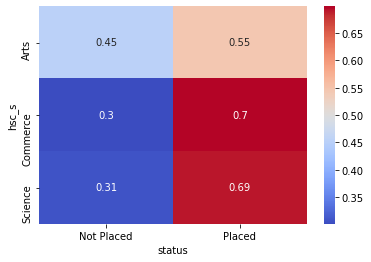

In [143]:
sns.heatmap(pd.crosstab(df.hsc_s, df.status, normalize='index'),
           cmap='coolwarm', annot=True)

In [144]:
p_value['hsc_s']

0.5727118511343621

In [145]:
# 12th specialisation does not affect the placements of a student

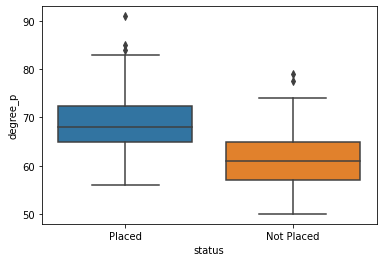

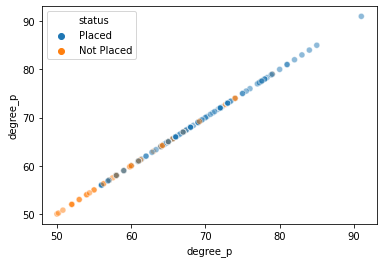

8.807682138862608e-14


In [146]:
### Does degree percentage affects the chances of a student getting placed? ###

sns.boxplot(df.status, df.degree_p)
plt.show()

sns.scatterplot(x='degree_p', y='degree_p', hue='status', data=df, alpha=0.5)
plt.show()

print(p_value['degree_p'])

In [147]:
# A student have a high success of getting placed if he/she got higher marks in degree

In [148]:
### Is there a degree specialisation that favours placements? ###

print(pd.crosstab(df.degree_t, df.status, normalize='index') * 100)
print('\n')
print(p_value['degree_t'])

status     Not Placed     Placed
degree_t                        
Comm&Mgmt   29.655172  70.344828
Others      54.545455  45.454545
Sci&Tech    30.508475  69.491525


0.22661076190356658


In [149]:
# If the major is Comm&Mgmt or Sci&Tech, then that student is more likely to get placed.

In [150]:
### Does having a work experience improve the odds of getting placed? ###

pd.crosstab(df.workex, df.status, normalize='index') * 100

status,Not Placed,Placed
workex,,
No,40.425532,59.574468
Yes,13.513514,86.486486


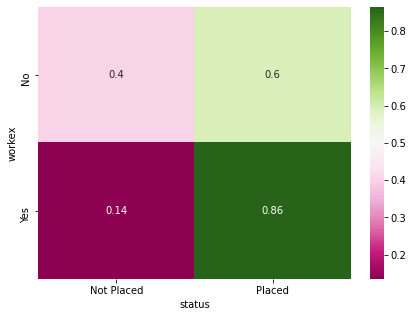

In [284]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.crosstab(df.workex, df.status, normalize='index'),
           annot=True, cmap='PiYG')
plt.savefig('plots/work_status_heatmap.png')

In [151]:
# If the student doesn't have a work experience, then he/she has only 59.5% of getting placed, 
# but if he/she have work experience then the odds of getting placed increases to 86.4%

array([0, 1])

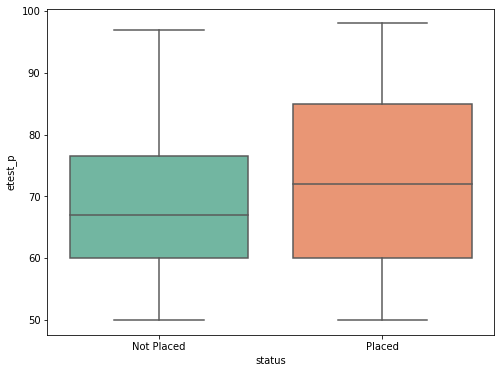

In [25]:
df.etest_p.median()

71.0

status
Not Placed    67.0
Placed        72.0
Name: etest_p, dtype: float64


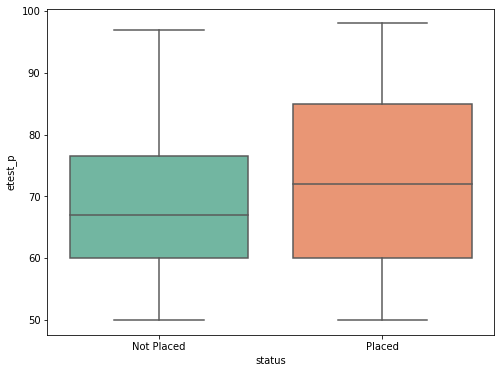

In [23]:
### Does the marks from employability test matters for getting placed? ###

plt.figure(figsize=(8,6))
bp = sns.boxplot(x='status', y='etest_p', data=df, palette='Set2', order=['Not Placed', 'Placed'])

medians = df.groupby(['status'])['etest_p'].median()
vertical_offset = df['etest_p'].median() * 0.02 # offset from median for display

for xtick in bp.get_xticks():
    bp.text(xtick,medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment='center',fontsize=10,color='w',weight='semibold')

plt.title('Box plot of Employability test score.', size=20)
plt.ylabel('Employability test score')
plt.xlabel('Status')
plt.savefig('plots/Box_of_etest_p.png')
plt.show()

In [153]:
p_value['etest_p']

0.061720381110174166

In [154]:
# The marks from employability test is not so significant in deciding whether a student should get placed or not.

In [155]:
### Is there a particular branch in MBA offers good placement results? ###

pd.crosstab(df.specialisation, df.status, normalize='index') * 100

status,Not Placed,Placed
specialisation,,
Mkt&Fin,20.833333,79.166667
Mkt&HR,44.210526,55.789474


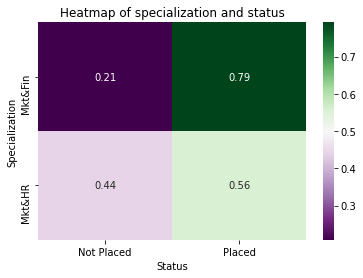

In [295]:
sns.heatmap(pd.crosstab(df.specialisation, df.status, normalize='index'),
           cmap='PRGn', annot=True)
plt.title('Heatmap of specialization and status')
plt.xlabel('Status')
plt.ylabel('Specialization')
plt.savefig('plots/special_status_heatmap.png')

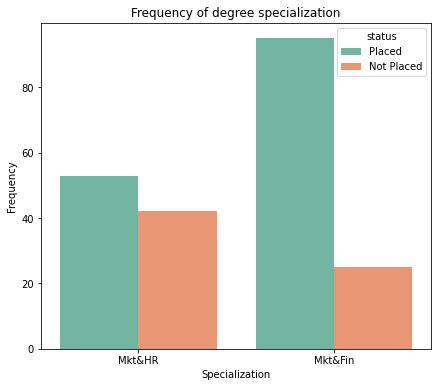

In [289]:
plt.figure(figsize=(7,6))
sns.countplot('specialisation', data=df, hue='status',
             palette='Set2')
plt.title('Frequency of degree specialization')
plt.xlabel('Specialization')
plt.ylabel('Frequency')
plt.savefig('plots/special_status_count.png')

In [156]:
chi2('specialisation', 'status', df)

Ho:  There is no significant assosiation between specialisation and status (No predictability)
Ha:  There is a significant assosiation between specialisation and status (Good predictor)


Test Statistics:  12.440229009203623
P-value:  0.00042018425858864284 

Reject Ho,  There is a significant assosiation between specialisation and status (Good predictor)


0.00042018425858864284

In [157]:
# If the specialisation is Mkt&Fin, then the student has a 79.16% chance on getting placed, whereas there is only
# 55.7% chance if the specialisation is Mkt&HR.

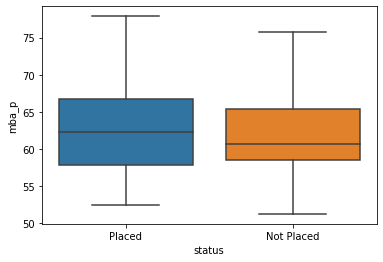

Ho:  There is no significant impact of mba_p on status (No predictability)
Ha:  There is a significant impact of mba_p on status (Good Predictor)


Test Statistics:  1.1259706009659818
P-value:  0.26144500197748627 

Fail to reject Ho,  There is no significant impact of mba_p on status (No predictability)


0.26144500197748627

In [158]:
### Does the marks scored in MBA affects placements? ###

sns.boxplot(df.status, df.mba_p)
plt.show()

t_test('mba_p', 'status', df)

In [159]:
# The percentage marks scored in MBA is not a factor on deciding whether the student should get placed or not.

#### salary

In [160]:
# Salary offered by corporate to candidates

In [161]:
df.salary.describe()

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary'>

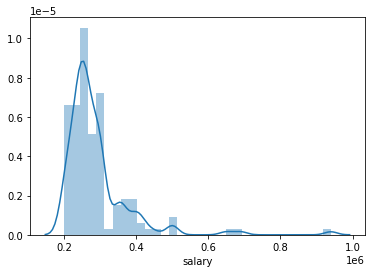

In [162]:
sns.distplot(df.salary)

In [163]:
# The min salary given is 2L and the maximum salary is 9.4L

In [164]:
### What are the features of the student who got the highest salary package? ###

df.iloc[df.salary.argmax()]

sl_no                   120
gender                    M
ssc_p                  60.8
ssc_b               Central
hsc_p                  68.4
hsc_b               Central
hsc_s              Commerce
degree_p               64.6
degree_t          Comm&Mgmt
workex                  Yes
etest_p               82.66
specialisation      Mkt&Fin
mba_p                 64.34
status               Placed
salary             940000.0
Name: 119, dtype: object

In [165]:
# Now lets see the highest scores in all numeric features

for i in df.columns:
    if df[i].dtypes !='O':
        print(f'{i}: {df[i].max()}')

sl_no: 215
ssc_p: 89.4
hsc_p: 97.7
degree_p: 91.0
etest_p: 98.0
mba_p: 77.89
salary: 940000.0


In [166]:
### What are the features of the student who got the lowerst salary package? ###

df.iloc[df.salary.argmin()]

sl_no                    2
gender                   M
ssc_p                79.33
ssc_b              Central
hsc_p                78.33
hsc_b               Others
hsc_s              Science
degree_p             77.48
degree_t          Sci&Tech
workex                 Yes
etest_p               86.5
specialisation     Mkt&Fin
mba_p                66.28
status              Placed
salary            200000.0
Name: 1, dtype: object

In [167]:
df[df.salary==200_000]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.0,Mkt&Fin,64.66,Placed,200000.0
44,45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.0,Mkt&Fin,69.70,Placed,200000.0
50,51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.0,Mkt&HR,62.98,Placed,200000.0
107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.0,Mkt&HR,73.52,Placed,200000.0
135,136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.6,Mkt&HR,65.63,Placed,200000.0


In [168]:
# 6 students got the lowest package of 2L.

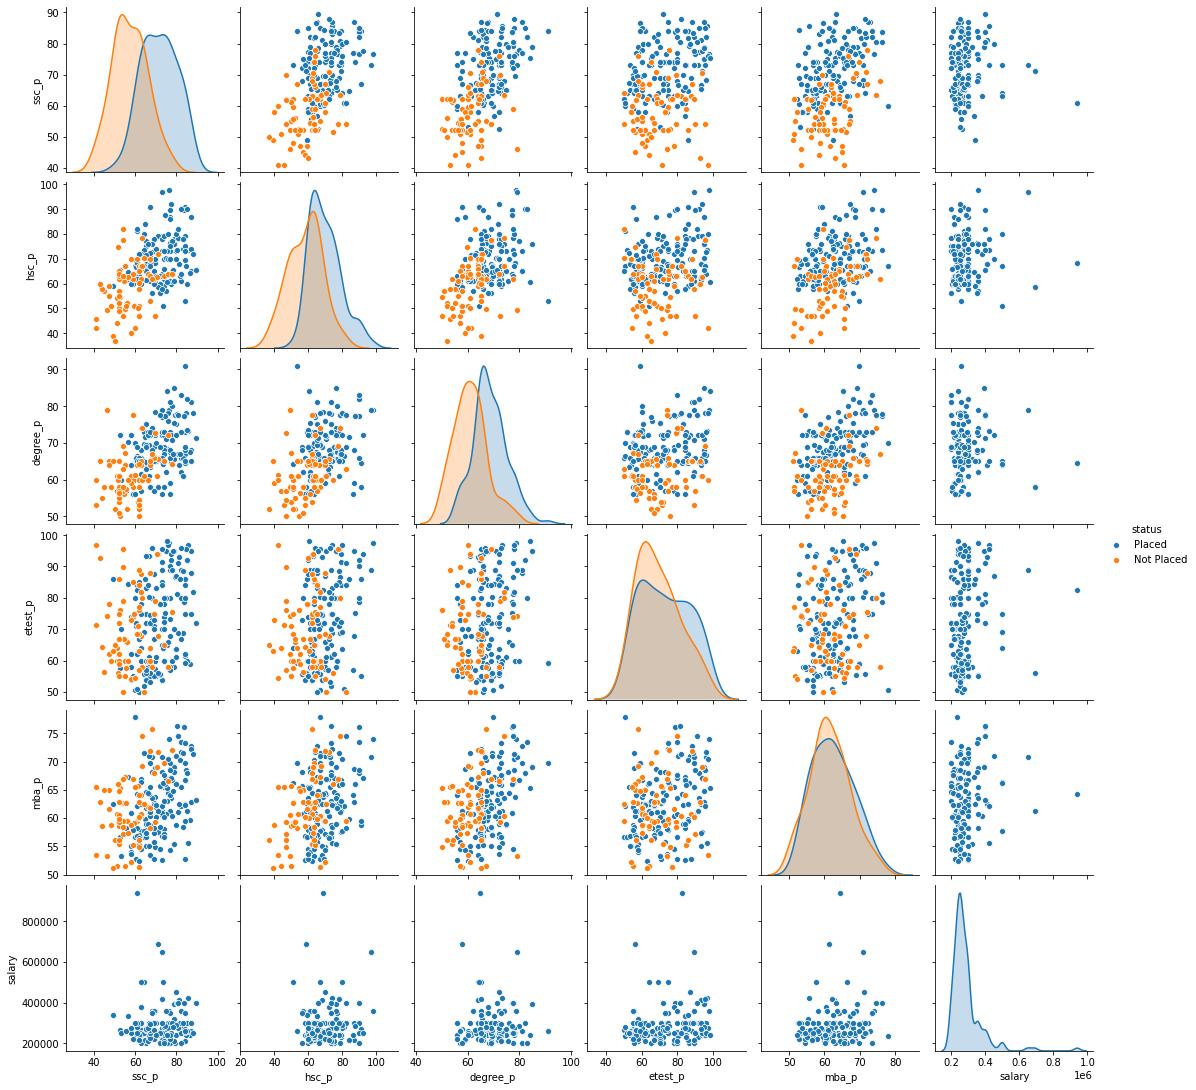

In [169]:
sns.pairplot(df.drop('sl_no', axis=1), hue='status')

## P-Value

In [170]:
p_value_df = pd.DataFrame(p_value.values(), index=p_value.keys(), columns=['p_value'])
p_value_df

,p_value
gender,2.398026e-01
ssc_p,4.115201e-23
ssc_b,6.897729e-01
hsc_p,1.849213e-14
hsc_b,9.222837e-01
hsc_s,5.727119e-01
degree_p,8.807682e-14
degree_t,2.266108e-01
workex,9.906585e-05
etest_p,6.172038e-02


In [171]:
p_value_df['Accept/Reject'] = p_value_df['p_value'].apply(lambda x: 'Reject' if x>0.05 else 'Accept')
p_value_df

,p_value,Accept/Reject
gender,2.398026e-01,Reject
ssc_p,4.115201e-23,Accept
ssc_b,6.897729e-01,Reject
hsc_p,1.849213e-14,Accept
hsc_b,9.222837e-01,Reject
hsc_s,5.727119e-01,Reject
degree_p,8.807682e-14,Accept
degree_t,2.266108e-01,Reject
workex,9.906585e-05,Accept
etest_p,6.172038e-02,Reject


In [275]:
p_value_df.to_csv('p_value.csv')

In [276]:
p_value_df[p_value_df['Accept/Reject']=='Reject']

# Preprocessing

,p_value,Accept/Reject
gender,0.239803,Reject
ssc_b,0.689773,Reject
hsc_b,0.922284,Reject
hsc_s,0.572712,Reject
degree_t,0.226611,Reject
etest_p,0.061720,Reject
mba_p,0.261445,Reject


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
# drop.append('sl_no')
drop.append('status')
drop.append('salary')
drop

In [175]:
X = df.drop(drop, axis=1)
y = df['status']

In [176]:
X.head()

,ssc_p,hsc_p,degree_p,workex,specialisation
0,67.00,91.00,58.00,No,Mkt&HR
1,79.33,78.33,77.48,Yes,Mkt&Fin
2,65.00,68.00,64.00,No,Mkt&Fin
3,56.00,52.00,52.00,No,Mkt&HR
4,85.80,73.60,73.30,No,Mkt&Fin


In [177]:
y.head()

0        Placed
1        Placed
2        Placed
3    Not Placed
4        Placed
Name: status, dtype: object

In [178]:
X.shape

(215, 5)

In [179]:
y.shape

(215,)

## train test split

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [181]:
X_train.head()

,ssc_p,hsc_p,degree_p,workex,specialisation
198,67.0,70.0,65.0,No,Mkt&HR
82,63.0,67.0,74.0,No,Mkt&Fin
65,54.0,47.0,57.0,No,Mkt&HR
109,52.0,63.0,65.0,Yes,Mkt&HR
182,52.0,65.0,57.0,Yes,Mkt&Fin


In [182]:
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']
num_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
cat_cols

['workex', 'specialisation']

In [183]:
num_cols

['ssc_p', 'hsc_p', 'degree_p']

In [184]:
len(X_train.columns) == len(cat_cols) + len(num_cols)

True

## Scaling and Encoding

In [185]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [186]:
ct = ColumnTransformer([
    ('scaling', StandardScaler(), num_cols),
    ('encoding', OneHotEncoder(drop='first'), cat_cols)
])

In [187]:
X_train_new = ct.fit_transform(X_train)
X_train_new[0]

array([-0.03310727,  0.35343845, -0.1115059 ,  0.        ,  1.        ])

In [188]:
X_test_new = ct.transform(X_test)
X_test_new[0]

array([ 0.14836872, -0.53795738, -0.1115059 ,  0.        ,  0.        ])

In [189]:
cat_cols_en = ct.transformers_[1][1].get_feature_names(cat_cols)
cat_cols_en_ls = []
for i in cat_cols_en:
    cat_cols_en_ls.append(i)

In [190]:
all_cols = num_cols + cat_cols_en_ls
all_cols

['ssc_p', 'hsc_p', 'degree_p', 'workex_Yes', 'specialisation_Mkt&HR']

In [191]:
X_train_new = pd.DataFrame(X_train_new, columns=all_cols)
X_test_new = pd.DataFrame(X_test_new, columns=all_cols)

In [192]:
X_train_new.head()

,ssc_p,hsc_p,degree_p,workex_Yes,specialisation_Mkt&HR
0,-0.033107,0.353438,-0.111506,0.0,1.0
1,-0.396059,0.086020,1.087196,0.0,0.0
2,-1.212701,-1.696772,-1.177019,0.0,1.0
3,-1.394177,-0.270539,-0.111506,1.0,1.0
4,-1.394177,-0.092259,-1.177019,1.0,0.0


In [193]:
X_test_new.head()

,ssc_p,hsc_p,degree_p,workex_Yes,specialisation_Mkt&HR
0,0.148369,-0.537957,-0.111506,0.0,0.0
1,-0.033107,0.086020,0.954007,1.0,0.0
2,1.327963,-0.181399,0.954007,1.0,0.0
3,-0.759011,-0.537957,-1.310208,0.0,1.0
4,-0.214583,0.799136,0.421250,1.0,0.0


In [194]:
y_train.head()

198    Not Placed
82     Not Placed
65     Not Placed
109    Not Placed
182    Not Placed
Name: status, dtype: object

In [195]:
y_train.value_counts()

Placed        104
Not Placed     46
Name: status, dtype: int64

In [196]:
y_train = y_train.replace(['Placed', 'Not Placed'], [1,0])
y_train.head()

198    0
82     0
65     0
109    0
182    0
Name: status, dtype: int64

In [197]:
y_train.value_counts()

1    104
0     46
Name: status, dtype: int64

In [198]:
y_test.head()

200    Placed
212    Placed
138    Placed
176    Placed
15     Placed
Name: status, dtype: object

In [199]:
y_test = y_test.replace(['Placed', 'Not Placed'], [1,0])
y_test.head()

200    1
212    1
138    1
176    1
15     1
Name: status, dtype: int64

In [200]:
y_test.value_counts()

1    44
0    21
Name: status, dtype: int64

# Model 1: Logistic Regression

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
model1 = LogisticRegression()

In [203]:
model1.fit(X_train_new, y_train)

LogisticRegression()

In [204]:
y_pred = model1.predict(X_test_new)

In [205]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      dtype=int64)

In [206]:
y_test.values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [207]:
y_pred_proba = model1.predict_proba(X_test_new)

In [208]:
### Some functions for model evaluation



def accuracy_01(cm):
    acc_1 = cm['Predicted'][1][1] / (cm['Predicted'][1][0]+cm['Predicted'][1][1])
    acc_0 = cm['Predicted'][0][0] / (cm['Predicted'][0][0]+cm['Predicted'][0][1])
    return (acc_0, acc_1)

In [209]:
def plot_roc(test, pred_proba):
    
    from sklearn.metrics import roc_curve, auc
    
    fpr, tpr, th = roc_curve(test, pred_proba[:,1])
    
    auc_score = auc(fpr, tpr)
    print('AUC score: ', auc_score)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC area=%.2f'%auc_score)
    plt.plot([0,1], [0,1], label='No Skill')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend()
    plt.show()
    
    return auc_score

## Model Evaluation

In [210]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             classification_report, confusion_matrix, auc, roc_curve)

In [211]:
model1_acc, model1_pre, model1_rec = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

In [212]:
model1_acc

0.7538461538461538

In [213]:
model1_pre

0.7592592592592593

In [214]:
model1_rec

0.9318181818181818

In [215]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.38      0.50        21
           1       0.76      0.93      0.84        44

    accuracy                           0.75        65
   macro avg       0.74      0.66      0.67        65
weighted avg       0.75      0.75      0.73        65



In [216]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[['Actual','Actual'],[0,1]],
                  columns=[['Predicted','Predicted'],[0,1]])
cm

Predicted    
                 0   1
Actual 0         8  13
       1         3  41

In [217]:
model1_acc0, model1_acc1 = accuracy_01(cm)
model1_acc0

0.7272727272727273

In [218]:
model1_acc1

0.7592592592592593

AUC score:  0.8928571428571429


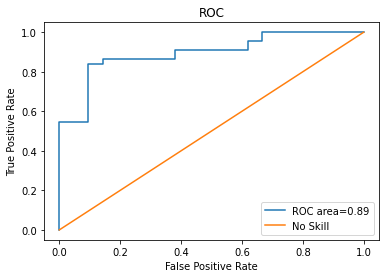

In [219]:
model1_roc = plot_roc(y_test, y_pred_proba)

# Model 2: Random Forest Classifier

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
model2 = RandomForestClassifier(n_estimators=300)

In [222]:
model2.fit(X_train_new, y_train)

RandomForestClassifier(n_estimators=300)

In [223]:
y_pred = model2.predict(X_test_new)

In [224]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [225]:
y_test.values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [226]:
y_pred_proba = model2.predict_proba(X_test_new)

## Model Evaluation

In [227]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             classification_report, confusion_matrix, auc, roc_curve)

In [228]:
model2_acc, model2_pre, model2_rec = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

In [229]:
model2_acc

0.8

In [230]:
model2_pre

0.8297872340425532

In [231]:
model2_rec

0.8863636363636364

In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.83      0.89      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.75      0.76        65
weighted avg       0.80      0.80      0.80        65



In [233]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[['Actual','Actual'],[0,1]],
                  columns=[['Predicted','Predicted'],[0,1]])
cm

Predicted    
                 0   1
Actual 0        13   8
       1         5  39

In [234]:
model2_acc0, model2_acc1 = accuracy_01(cm)
model2_acc0

0.7222222222222222

In [235]:
model2_acc1

0.8297872340425532

AUC score:  0.9009740259740259


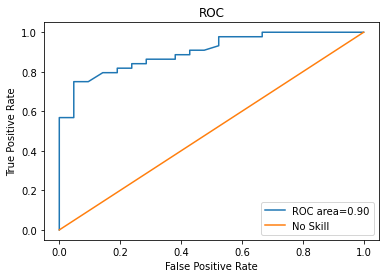

In [236]:
model2_roc = plot_roc(y_test, y_pred_proba)

# Model 3: K-Nearest Neighbor

In [237]:
from sklearn.neighbors import KNeighborsClassifier

In [238]:
model3 = KNeighborsClassifier()

In [239]:
model3.fit(X_train_new, y_train)

KNeighborsClassifier()

In [240]:
y_pred = model3.predict(X_test_new)

In [241]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      dtype=int64)

In [242]:
y_test.values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [243]:
y_pred_proba = model3.predict_proba(X_test_new)

## Model Evaluation

In [244]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             classification_report, confusion_matrix, auc, roc_curve)

In [245]:
model3_acc, model3_pre, model3_rec = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

In [246]:
model3_acc

0.7538461538461538

In [247]:
model3_pre

0.7592592592592593

In [248]:
model3_rec

0.9318181818181818

In [249]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.38      0.50        21
           1       0.76      0.93      0.84        44

    accuracy                           0.75        65
   macro avg       0.74      0.66      0.67        65
weighted avg       0.75      0.75      0.73        65



In [250]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[['Actual','Actual'],[0,1]],
                  columns=[['Predicted','Predicted'],[0,1]])
cm

Predicted    
                 0   1
Actual 0         8  13
       1         3  41

In [251]:
model3_acc0, model3_acc1 = accuracy_01(cm)
model3_acc0

0.7272727272727273

In [252]:
model3_acc1

0.7592592592592593

AUC score:  0.7987012987012987


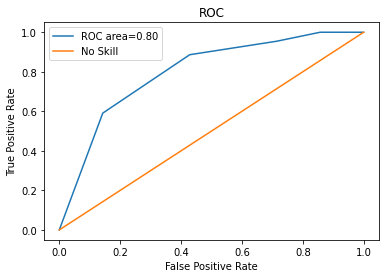

In [253]:
model3_roc = plot_roc(y_test, y_pred_proba)

# Model 4: Support Vector Machines

In [254]:
from sklearn.svm import SVC

In [255]:
model4 = SVC(probability=True)

In [256]:
model4.fit(X_train_new, y_train)

SVC(probability=True)

In [257]:
y_pred = model4.predict(X_test_new)

In [258]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      dtype=int64)

In [259]:
y_test.values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [260]:
y_pred_proba = model4.predict_proba(X_test_new)

## Model Evaluation

In [261]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             classification_report, confusion_matrix, auc, roc_curve)

In [262]:
model4_acc, model4_pre, model4_rec = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

In [263]:
model4_acc

0.7538461538461538

In [264]:
model4_pre

0.7592592592592593

In [265]:
model4_rec

0.9318181818181818

In [266]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.38      0.50        21
           1       0.76      0.93      0.84        44

    accuracy                           0.75        65
   macro avg       0.74      0.66      0.67        65
weighted avg       0.75      0.75      0.73        65



In [267]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[['Actual','Actual'],[0,1]],
                  columns=[['Predicted','Predicted'],[0,1]])
cm

Predicted    
                 0   1
Actual 0         8  13
       1         3  41

In [268]:
model4_acc0, model4_acc1 = accuracy_01(cm)
model4_acc0

0.7272727272727273

In [269]:
model4_acc1

0.7592592592592593

AUC score:  0.8300865800865801


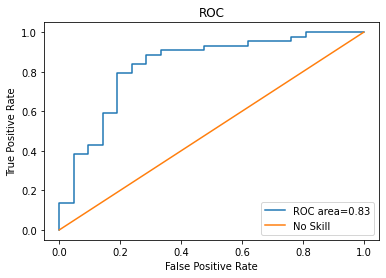

In [270]:
model4_roc = plot_roc(y_test, y_pred_proba)

# Model Comparison

In [277]:
mc = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Random Forest', 'KNN', 'SVM'],
    'Accuracy': [model1_acc, model2_acc, model3_acc, model4_acc],
    'Accuracy 0': [model1_acc0, model2_acc0, model3_acc0, model4_acc0],
    'Accuracy 1': [model1_acc1, model2_acc1, model3_acc1, model4_acc1],
    'Precision': [model1_pre, model2_pre, model3_pre, model4_pre],
    'Recall': [model1_rec, model2_rec, model3_rec, model4_rec],
    'ROC area': [model1_roc, model2_roc, model3_roc, model4_roc]
})
mc
mc.to_csv('model_comparison.csv')

In [272]:
# Based on the model comparison, Random Forest model has a high chance of correctly classifying the class 1,
# and all the other model performs equally good on class 0, but logistic regression model has a high roc area.